In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import t
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp

In [2]:
df1 = pd.read_csv("/Users/user/Desktop/EpicWin/Data/20210706-20210713-WuKongBlessing.csv")
df2 = pd.read_csv("/Users/user/Desktop/EpicWin/Data/20210806-20210813-WuKongBlessing.csv")

In [3]:
df1.head()

,NickName,GameName,BetCount,ValidTurnover
0,0102011401@epwnc,WuKongBlessing,50,19.6
1,0102027387@epwnc,WuKongBlessing,134,327.4
2,0102032668@epwnc,WuKongBlessing,72,182.2
3,0102079785@epwnc,WuKongBlessing,56,20.6
4,0102553737@epwnc,WuKongBlessing,2,0.4


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NickName       415 non-null    object 
 1   GameName       415 non-null    object 
 2   BetCount       415 non-null    int64  
 3   ValidTurnover  415 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 13.1+ KB


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   NickName       410 non-null    object 
 1   GameName       410 non-null    object 
 2   BetCount       410 non-null    int64  
 3   ValidTurnover  410 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 12.9+ KB


In [6]:
df1.describe()

,BetCount,ValidTurnover
count,415.000000,415.000000
mean,227.368675,145.003855
std,414.961690,457.834259
min,1.000000,0.200000
25%,46.500000,16.000000
50%,106.000000,39.200000
75%,235.000000,101.900000
max,5655.000000,7414.400000


In [7]:
df2.describe()

,BetCount,ValidTurnover
count,410.000000,410.000000
mean,262.080488,232.300000
std,458.833778,978.678845
min,1.000000,0.200000
25%,47.250000,13.250000
50%,109.000000,42.100000
75%,271.250000,129.150000
max,4190.000000,15280.000000


In [8]:
# calculate means
mean1, mean2 = np.mean(df1['ValidTurnover']), np.mean(df2['ValidTurnover'])
print(mean1)
print(mean2)

145.0038554216867
232.2999999999999


In [9]:
# calculate sample standard deviations
std1, std2 = np.std(df1['ValidTurnover']), np.std(df2['ValidTurnover'])

In [10]:
# calculate standard errors
n1, n2 = len(df1), len(df2)
se1, se2 = std1/np.sqrt(n1), std2/np.sqrt(n2)
print(se1)
print(se2)

22.447106192545203
48.27452376620876


In [11]:
# standard error on the difference between the samples
sed = np.sqrt(se1**2.0 + se2**2.0)
sed

53.23816508176869

Text(0.5, 1.0, 'After')

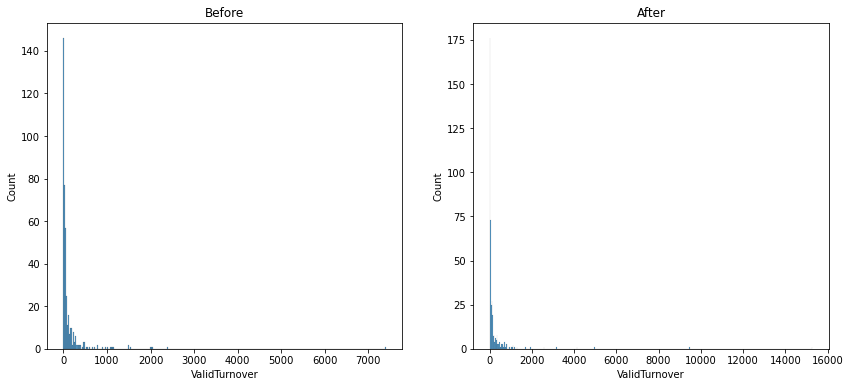

In [12]:
# histogram
fig, axs = plt.subplots(1,2 , figsize=(14, 6))

sns.histplot(data= df1 , x="ValidTurnover" , ax=axs[0])
axs[0].set_title('Before')

sns.histplot(data= df2 , x="ValidTurnover" , ax=axs[1])
axs[1].set_title('After')

Text(0.5, 1.0, 'After')

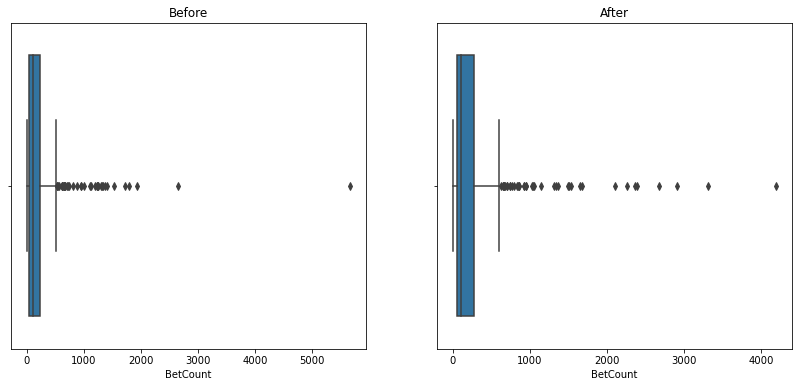

In [13]:
# boxplot
fig, axs = plt.subplots(1,2 , figsize=(14, 6))

sns.boxplot(data= df1 , x="BetCount" , ax=axs[0])
axs[0].set_title('Before')

sns.boxplot(data= df2 , x="BetCount" , ax=axs[1])
axs[1].set_title('After')

In [14]:
summary, results = rp.ttest(group1 = df1['ValidTurnover'], group1_name= "Before",
                            group2 = df2['ValidTurnover'], group2_name= "After")

In [15]:
print(summary)

   Variable      N        Mean          SD         SE   95% Conf.    Interval
0    Before  415.0  145.003855  457.834259  22.474200  100.826082  189.181629
1     After  410.0  232.300000  978.678845  48.333503  137.286915  327.313085
2  combined  825.0  188.387394  763.309392  26.575022  136.224689  240.550099


In [16]:
print(results)

               Independent t-test   results
0  Difference (Before - After) =   -87.2961
1           Degrees of freedom =   823.0000
2                            t =    -1.6441
3        Two side test p value =     0.1005
4       Difference < 0 p value =     0.0503
5       Difference > 0 p value =     0.9497
6                    Cohen's d =    -0.1145
7                    Hedge's g =    -0.1144
8                Glass's delta =    -0.1907
9                  Pearson's r =     0.0572


In [17]:
# results
stats.ttest_ind( df1['ValidTurnover'], df2['ValidTurnover'])

Ttest_indResult(statistic=-1.6441135699710976, pvalue=0.10053465069637421)

In [18]:
# define alpha and degree of freedom
alpha = 0.95
dof = len(df1) - 1

# critical value
value = t.ppf(1-alpha/2, dof)
print(value)

0.0627448048898181
